In [1]:
import yfinance as yf
import os
import pandas as pd

In [2]:
btc_ticker = yf.Ticker("BTC-USD")

In [3]:
btc =  btc_ticker.history(period ="max")

btc.index = btc.index.tz_localize(None)

In [4]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-26,63138.546875,65790.796875,62669.269531,65181.019531,36873129847,0.0,0.0
2024-09-27,65180.664062,66480.695312,64852.992188,65790.664062,32058813449,0.0,0.0
2024-09-28,65792.179688,66255.531250,65458.035156,65887.648438,15243637984,0.0,0.0


In [5]:
btc.index = pd.to_datetime(btc.index)

In [6]:
del btc["Dividends"]
del btc["Stock Splits"]

In [7]:
btc.columns = [c.lower() for c in btc.columns]

<Axes: xlabel='Date'>

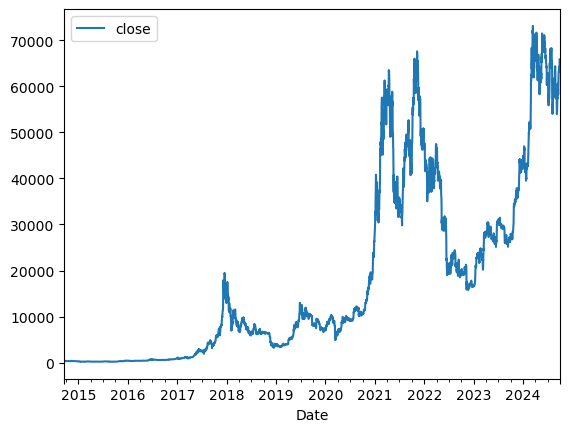

In [8]:
btc.plot.line(y="close", use_index=True)

In [10]:
wiki = pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates = True)

In [11]:
wiki

,edit_count,sentiment,neg_sentiment
2009-04-07,0.0,0.0,0.0
2009-04-08,0.0,0.0,0.0
2009-04-09,0.0,0.0,0.0
2009-04-10,0.0,0.0,0.0
2009-04-11,0.0,0.0,0.0
...,...,...,...
2024-09-26,0.0,0.0,0.0
2024-09-27,0.0,0.0,0.0
2024-09-28,0.0,0.0,0.0
2024-09-29,0.0,0.0,0.0


In [12]:
btc = btc.merge(wiki, left_index = True, right_index=True)

In [13]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0,0.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0,0.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0,0.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0,0.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-09-26,63138.546875,65790.796875,62669.269531,65181.019531,36873129847,0.0,0.0,0.0
2024-09-27,65180.664062,66480.695312,64852.992188,65790.664062,32058813449,0.0,0.0,0.0
2024-09-28,65792.179688,66255.531250,65458.035156,65887.648438,15243637984,0.0,0.0,0.0
2024-09-29,65888.898438,66069.343750,65450.015625,65635.304688,14788214575,0.0,0.0,0.0


In [14]:
btc["tomorrow"] = btc["close"].shift(-1)

In [15]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0,0.0,424.440002
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0,0.0,394.795990
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0,0.0,408.903992
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0,0.0,398.821014
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0,0.0,402.152008
...,...,...,...,...,...,...,...,...,...
2024-09-26,63138.546875,65790.796875,62669.269531,65181.019531,36873129847,0.0,0.0,0.0,65790.664062
2024-09-27,65180.664062,66480.695312,64852.992188,65790.664062,32058813449,0.0,0.0,0.0,65887.648438
2024-09-28,65792.179688,66255.531250,65458.035156,65887.648438,15243637984,0.0,0.0,0.0,65635.304688
2024-09-29,65888.898438,66069.343750,65450.015625,65635.304688,14788214575,0.0,0.0,0.0,63908.617188


In [16]:
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)

In [17]:
btc["target"].value_counts()

target
1    1938
0    1729
Name: count, dtype: int64

In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50,random_state=1)

train= btc.iloc[:-200]
test = btc[-200:]

predictors = ["close", "volume", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [19]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.5957446808510638

In [20]:
def predict(train, test, model, predictors):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    return pd.Series(preds, index=test.index, name="predictions")

In [21]:
def backtest(data, model, predictors, start=0, step=1):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, model, predictors)
        # Include the actual target values in the predictions DataFrame
        predictions = pd.concat([test["target"], predictions], axis=1)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [25]:
from xgboost import XGBClassifier

# Create the XGBoost model
model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)

# Run the backtest
predictions = backtest(btc, model, predictors)

In [26]:

# Calculate precision score
precision_score(predictions["target"], predictions["predictions"])

0.5296630280018985

In [27]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon,min_peripds=1).mean()
        
        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"]/rolling_averages["close"]

        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon,closed="left", min_periods=1).mean()
        trend_column = f"trend_{horizons}"
        btc[trend_column] = rolling["target"]
        
        new_predictors += [ratio_column, trend_column, edit_column]
    return btc, new_predictors    
        

In [28]:
btc, new_predictors = compute_rolling(btc.copy())

TypeError: NDFrame.rolling() got an unexpected keyword argument 'min_peripds'

In [ ]:
btc

In [ ]:
predictions = backtest(btc, model, new_predictors)

In [ ]:
precision_score(predictions["target"], predictions["predictions"])

In [ ]:
predictions